In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# loading the dataset and exploring initial view of the data 

melbdf= pd.read_csv('melb_data.csv')
melbdf.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
melbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# Continuous variables

In [4]:
# The following table displays general summary statistics for the continuous variables
melbdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


The first data quality conclusions can be made:
- The extreme difference on the Price (target) variable  between the max and quartile values indicates some high outliers likley skewing other statistics.
- BuildingArea and YearBuilt  have a significant number of NaN values, but most of the attributes are well populated.
- There are variables with “0” values (Distance,Bathroom,Car,Landsize,BuildingArea).

 Next, we look at the linear correlation between each of the continuous variables in the dataset and check for collinearity.

<AxesSubplot:>

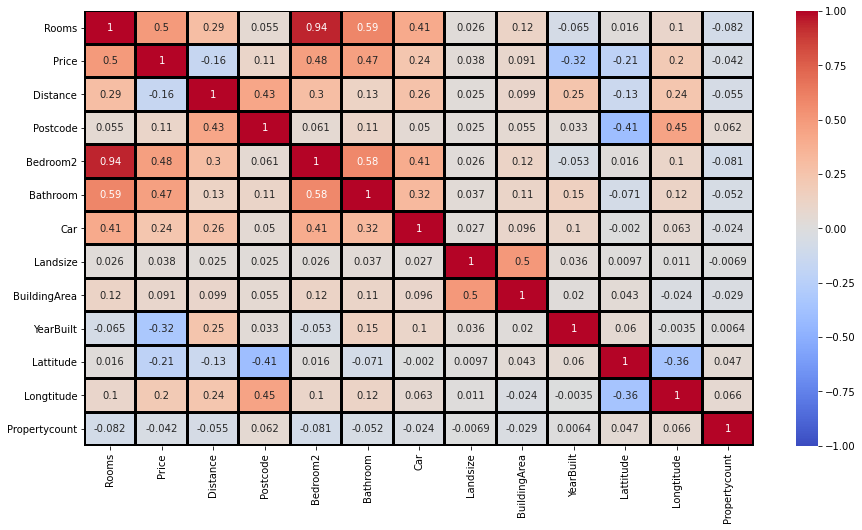

In [5]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(melbdf.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='black',ax=ax)

Values closer to 0 indicate weak or no correlation, positive values indicate positive correlation, and negative values indicate negative correlation. 

Conclusions:
-	All continuous variables have a correlation to the ‘Price’ with the highest value for ‘Rooms’ and ‘Bathroom’ and can be predictor variables. 
-	The correlation between Rooms and Bedroom2 is higher than 0.7, so they are collinear and cannot independently predict the value of the Price. Given Bedroom2 is from different source, it will be dropped.

Let's look at Price vs Rooms

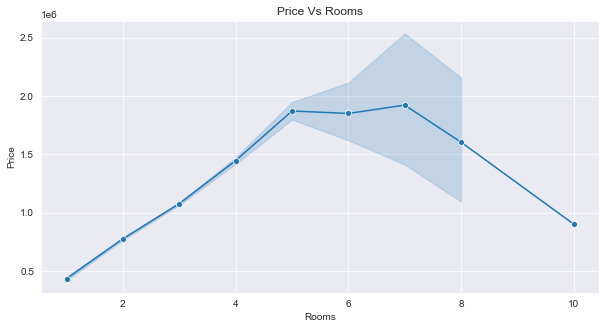

In [6]:
sns.set_style("darkgrid")
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=melbdf,x='Rooms',y='Price',marker='o')
plt.title('Price Vs Rooms') 
plt.xlabel('Rooms') 
plt.ylabel('Price');

Price drops for properties with 7 rooms or more. Possible reason is that larger houses with more than 7 rooms may be in more rural regions where in general prices are lower. 

Next, we will explore the relationships between ‘Price’ and categorical variables. 

# Categorical variables. Categorical variables vs Price.

### Region and Distance from business centre

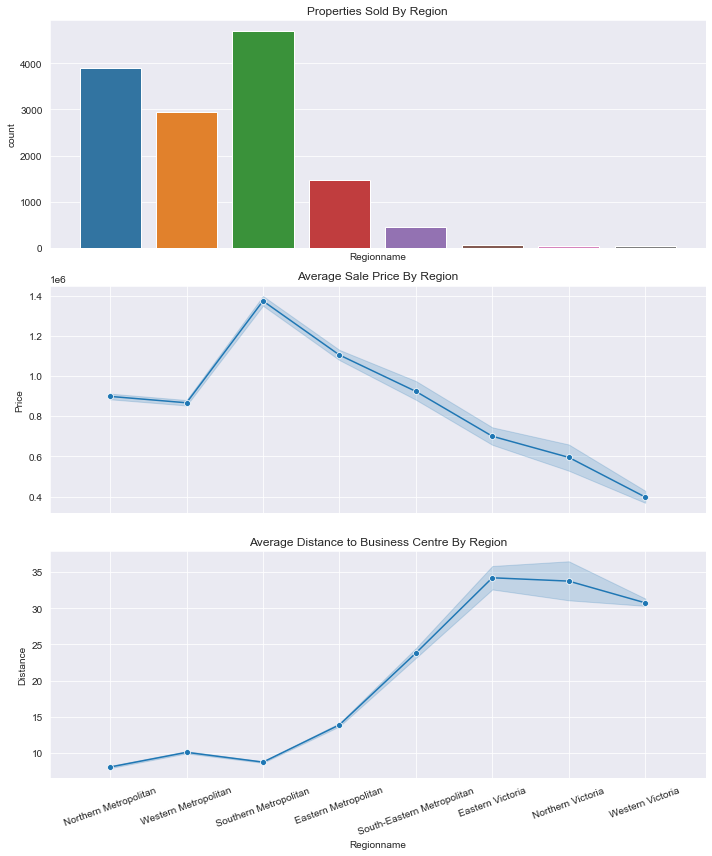

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12),sharex=True)

sns.countplot(data=melbdf, x='Regionname',ax=axes[0])
axes[0].set_title('Properties Sold By Region')

sns.lineplot(data=melbdf, x='Regionname', y='Price',marker='o',ax=axes[1])
axes[1].set_title('Average Sale Price By Region')

sns.lineplot(data=melbdf, x="Regionname", y='Distance',marker='o',ax=axes[2])
axes[2].set_title('Average Distance to Business Centre By Region')
axes[2].tick_params(axis='x', rotation=20)
fig.tight_layout();

- From the first plot it is clear that Southern Metropolitan has seen the highest house sales followed by Northern and Western Metropolitan.
- The next line chart shows Southern Metropolitan has also the highest average sale prices whereas Western Victoria has the lowest. 
- Northern, Western, Southern, and Eastern Metropolitan regions are the sale leaders, which is logical, because it appears they are located within 20 kms of city business centre.

The region seems to influence the price, so property prices from all regions should be sufficiently represented.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


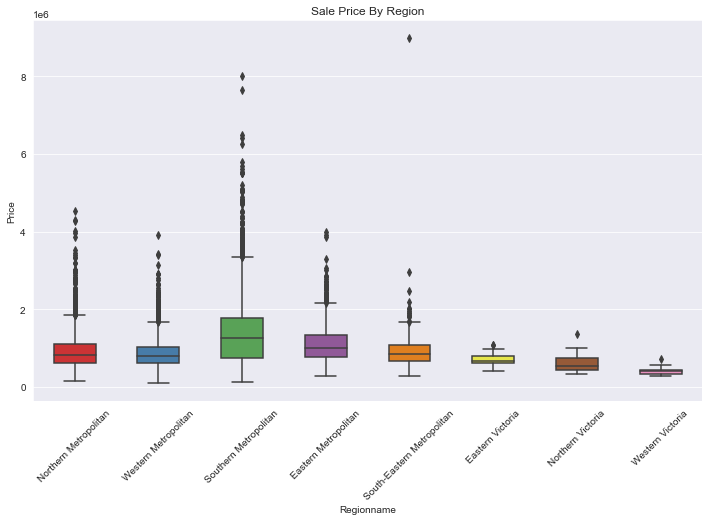

In [8]:
plt.figure(figsize=(12,7))
sns.boxplot('Regionname', 'Price', data=melbdf, width=0.5, palette="Set1")
plt.xticks(rotation=45)
plt.title('Sale Price By Region');

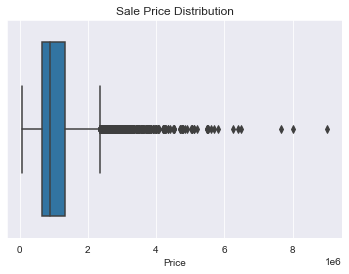

In [9]:
sns.boxplot(x='Price',data = melbdf)
plt.title('Sale Price Distribution');

Price distribution within each region is different with price outliers starting from 2M to 3M. The most houses are sold within 2,25M range.At the same time, estimating auction prices in this range is more difficult than in the luxury segment, where prices are more distinct. So, anything beyond this range can be considered as outliers and will not be included into the final datset.

### Type

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


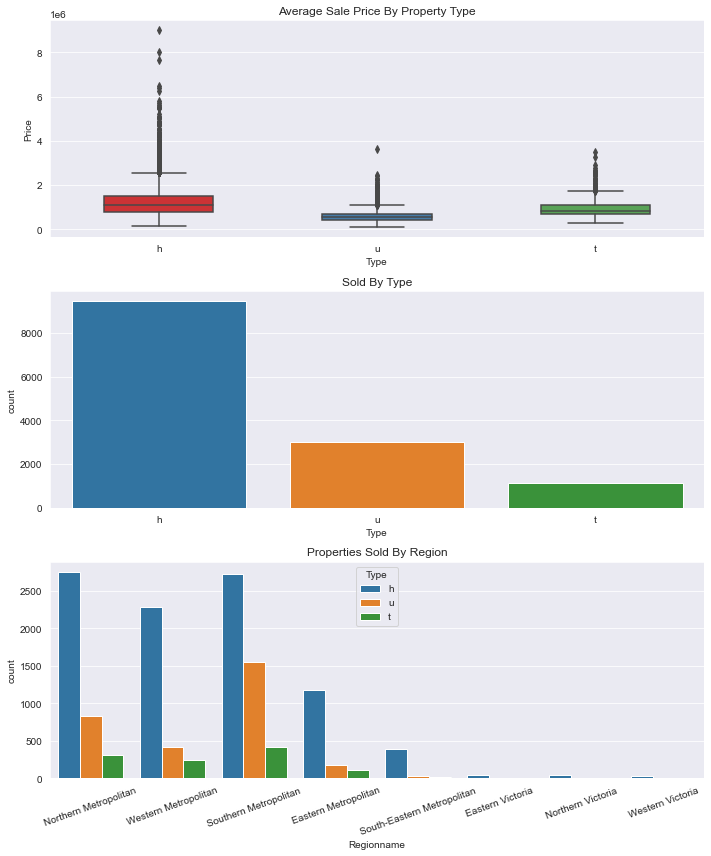

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

sns.boxplot('Type', 'Price', data=melbdf, width=0.5, palette="Set1",ax=axes[0])
axes[0].set_title('Average Sale Price By Property Type')

sns.countplot(x='Type',data=melbdf, ax=axes[1])
axes[1].set_title('Sold By Type')

sns.countplot(x='Regionname', data=melbdf, hue='Type',ax=axes[2])
axes[2].set_title('Properties Sold By Region')
axes[2].tick_params(axis='x', rotation=20)
fig.tight_layout();

- The dataset contains 75% houses and 25% units&townhouses. 
- The h-type has the highest average price, the u-type has the lowest, and the t-type is in between, reflecting the usual distribution of prices across property types. 
- Four sale leaders contain all three property types, with the first top seller having an h/u&t ratio of almost 50/50. 

### Sellers and Method

In [11]:
# Count unique values in column 'SellerG' including NaN
uniqueValues = melbdf['SellerG'].nunique(dropna=False)
print('Number of unique values in column "SellerG" including NaN:{}'.format(uniqueValues))

Number of unique values in column "SellerG" including NaN:268


There are more than 200 Real Estate Agents in the dataset. Converting this variable to numeric values will make the model too complex. In addition, the seller does not have a significant impact on the price of the property, so the column can be dropped.

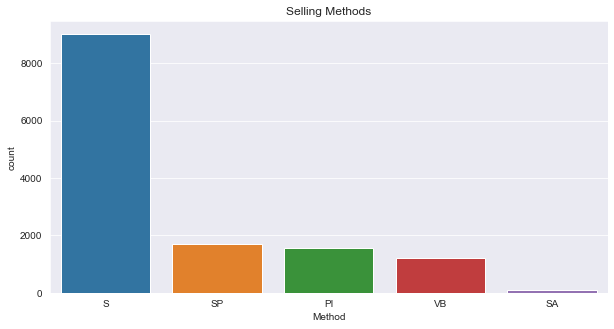

In [12]:
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Method",data = melbdf)
plt.title('Selling Methods');

Descriptions of each method:
 
    S - property sold; 
    SP - property sold prior; 
    PI - property passed in;
    VB - vendor bid;
    SA - sold after auction; 
    
Sold category is the highest. S,SA, and SP are a complete selling and will be used to filter the dataset. Rows with PI and VB method will be dropped.

### Address

We will check if there are duplicate addresses in the dataset.

In [13]:
addresses = melbdf["Address"]
melbdf[addresses.isin(addresses[addresses.duplicated()])].sort_values("Address")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4958,Preston,1 Bellarine St,4,h,1400000.0,VB,Jellis,18/03/2017,8.8,3072.0,...,2.0,2.0,559.0,217.0,1925.0,Darebin,-37.73470,144.99660,Northern Metropolitan,14577.0
9281,Preston,1 Bellarine St,5,h,1400000.0,PI,hockingstuart,3/06/2017,8.4,3072.0,...,2.0,2.0,558.0,217.0,1925.0,Darebin,-37.73472,144.99658,Northern Metropolitan,14577.0
9144,Essendon,1 Daisy St,4,h,1360000.0,S,Jellis,3/06/2017,7.5,3040.0,...,2.0,1.0,267.0,NaN,NaN,Moonee Valley,-37.75472,144.92723,Western Metropolitan,9264.0
7802,Essendon,1 Daisy St,4,h,1400000.0,VB,Nelson,8/04/2017,8.0,3040.0,...,2.0,1.0,267.0,NaN,NaN,Moonee Valley,-37.75580,144.91060,Western Metropolitan,9264.0
10732,Maidstone,1/1 Clarendon St,3,t,650000.0,PI,Jas,8/07/2017,6.4,3012.0,...,2.0,2.0,159.0,128.0,2016.0,Maribyrnong,-37.78502,144.86733,Western Metropolitan,3873.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5186,Reservoir,9/99 Barton St,2,u,335000.0,S,Love,22/08/2016,11.2,3073.0,...,1.0,1.0,0.0,54.0,2012.0,Darebin,-37.71120,144.99890,Northern Metropolitan,21650.0
11069,Heidelberg Heights,97 Edwin St,4,h,1645000.0,PI,Fletchers,12/08/2017,8.8,3081.0,...,2.0,4.0,596.0,120.0,1930.0,Banyule,-37.75008,145.05051,Eastern Metropolitan,2947.0
3227,Heidelberg Heights,97 Edwin St,2,h,815000.0,SP,Fletchers,3/09/2016,10.5,3081.0,...,1.0,2.0,589.0,120.0,1930.0,Banyule,-37.75010,145.05050,Eastern Metropolitan,2947.0
6835,Carlton,99 Neill St,3,h,1600000.0,SP,Nelson,17/09/2016,1.8,3053.0,...,3.0,1.0,0.0,192.0,NaN,Melbourne,-37.79450,144.97180,Northern Metropolitan,6786.0


There are properties with the same address sold multiple times. So, after method filtering the remaining duplicate addresses will be dropped.

# Missing values, both continuous and categorical

<AxesSubplot:>

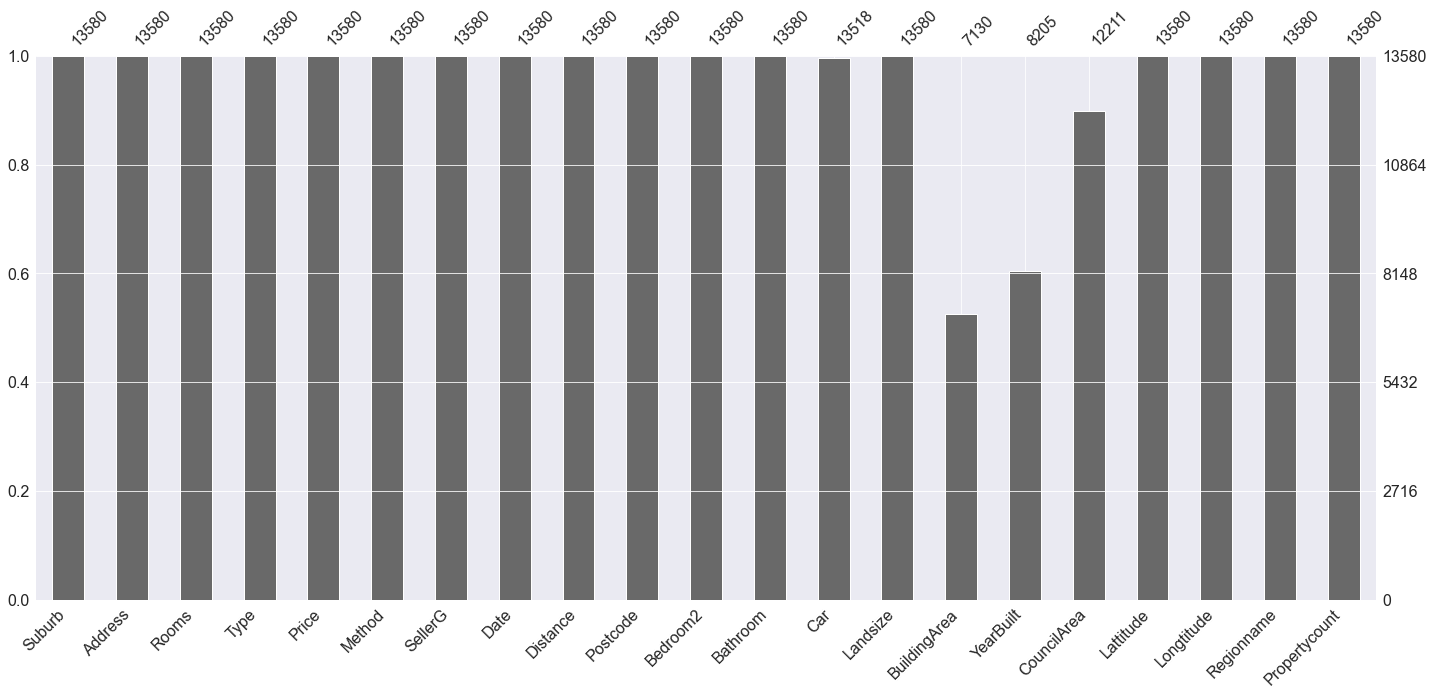

In [14]:
import missingno as msno
msno.bar(melbdf)

"CouncilArea" will be dropped from the dataset. As an alternative there can be used address, suburb and regionname as they also gives properties location.

"BuildingArea" has almost 50% missing data. NaN values will be filled with mean building area by property type.

‘Car’ has 62 missing values. It is possible that after filtering data by method, price and address duplicate there will be no ‘Nan’ left. 

"YearBuilt" has almost 40% missing data,and it seems impossible to replace all missing values with maintaining prediction accuracy. So, a new column “Build_Age” will be created and analyzed.  NaN values will be filled with median building age.


In [15]:
# creat new column with building age
# get df subset without nan building age for statistical analyze
melbdf['Build_Age']=2022-melbdf['YearBuilt']
df_bage=melbdf.dropna(subset=['Build_Age'])
df_bage.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Build_Age
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,122.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,122.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,8.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0,112.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0,132.0


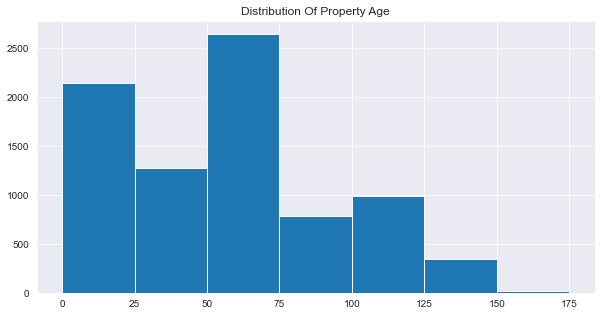

In [16]:
# check the distribution of property age
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
plt.hist(df_bage['Build_Age'], bins=np.arange(0, 200, 25))
plt.title('Distribution Of Property Age');

In [17]:
df_bage['Build_Age'].describe()

count    8205.000000
mean       57.315783
std        37.273762
min         4.000000
25%        23.000000
50%        52.000000
75%        82.000000
max       826.000000
Name: Build_Age, dtype: float64

In [18]:
# age=826 is most likely written by mistake. let's look at it.
df_bage.loc[df_bage['Build_Age'] == 826.0] 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Build_Age
9968,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,24/06/2017,14.2,3149.0,...,4.0,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366.0,826.0


Mean and median values are close, so each can be used to fill NaNs. Building age statistics and mistakes will be checked again after filtering data by method, price and address duplicate. All NaN and incorrect values will be replaced with mean or median. 

# Null values

Initial statistical analysis identified columns with null (zero) values. Now, we will count them.

In [19]:
print('Number of zeros in "Landsize":', (melbdf['Landsize'] == 0.0).sum())
print('Number of zeros in "Car":', (melbdf['Car'] == 0.0).sum())
print('Number of zeros in "Bathroom":', (melbdf['Bathroom'] == 0.0).sum())
print('Number of zeros in "Distance":', (melbdf['Distance'] == 0.0).sum())
print('Number of zeros in "BuildingArea":', (melbdf['BuildingArea'] == 0.0).sum())

Number of zeros in "Landsize": 1939
Number of zeros in "Car": 1026
Number of zeros in "Bathroom": 34
Number of zeros in "Distance": 6
Number of zeros in "BuildingArea": 17


- “No bathroom” in property cannot be reasonably explained and will be replaced with median.
- The distance can be 0 if the property is very close to a business center.
- BuildingArea : Null values will be filled with mean building area by property type.
- "No car parking spots" can be true for units (apartments) and townhouses. Houses should have at least one car spot. However, in Melbourne, houses in the business center (old part of the city) may not have a place to park a car.

Let's look at the subset of houses with null car spots.

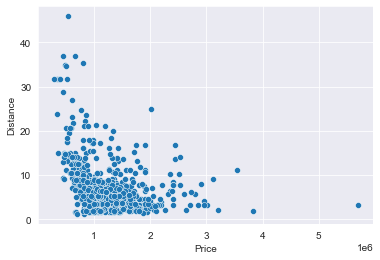

In [20]:
# check distance to center for houses with no car parking
cars=melbdf[melbdf['Car']==0.0]
sns.scatterplot(x=cars.Price[cars.Type=='h'], y=cars.Distance[cars.Type=='h']);

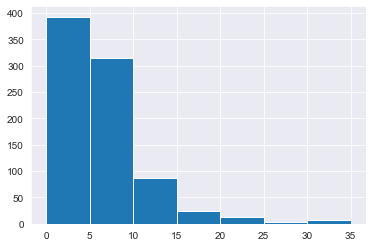

In [21]:
# check the distribution of distance to center for houses with no car parking
plt.hist(cars.Distance[cars.Type=='h'],bins=np.arange(0, 40, 5.0));

No car spot for almost 400 houses can be explained by the localization within the business center (0-3 km), but null values for other houses will be replaced with median car spots (2).

In [22]:
# subset with no land for property
landsize=melbdf[melbdf['Landsize']==0.0]
landsize

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Build_Age
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra,-37.80080,144.99730,Northern Metropolitan,4019.0,NaN
10,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,12/11/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra,-37.81100,145.00670,Northern Metropolitan,4019.0,NaN
12,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,...,1.0,0.0,94.00,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0,13.0
14,Abbotsford,7/20 Abbotsford St,1,u,441000.0,SP,Greg,14/05/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra,-37.80160,144.99880,Northern Metropolitan,4019.0,NaN
21,Abbotsford,13/11 Nicholson St,3,t,900000.0,S,Beller,18/03/2017,2.5,3067.0,...,2.0,0.0,NaN,2010.0,Yarra,-37.80930,144.99590,Northern Metropolitan,4019.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12168,St Kilda,45/151 Fitzroy St,2,u,600000.0,VB,hockingstuart,29/07/2017,5.0,3182.0,...,1.0,0.0,82.00,1930.0,Port Phillip,-37.85911,144.97900,Southern Metropolitan,13240.0,92.0
12176,Surrey Hills,6/91 Warrigal Rd,3,u,1050000.0,PI,hockingstuart,29/07/2017,10.2,3127.0,...,2.0,0.0,NaN,NaN,Whitehorse,-37.83358,145.09884,Southern Metropolitan,5457.0,NaN
12188,Tullamarine,9/200 Melrose Dr,2,u,300000.0,SP,Jason,29/07/2017,12.9,3043.0,...,1.0,0.0,66.32,1980.0,Hume,-37.69815,144.88019,Western Metropolitan,3296.0,42.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0,55.0


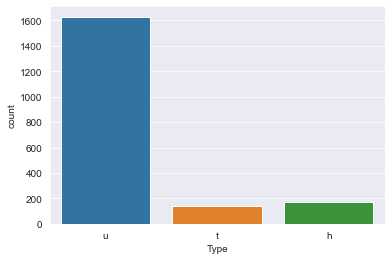

In [23]:
# property with no land by type
sns.countplot(x="Type",data = landsize);

- u -type stands for units and duplexes. We can assume that zero values are associated with units (apartments) that do not own land. 
- H-type and t-type can also have zero land depending on distance to the centres where land is expensive and type of residential development (row-houses, semi-detached).

 Null values will be left in this column.

# Month

In [24]:
# Converting Date to Datetime from object type and extracting month&year
melbdf['Date'] = melbdf['Date'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y'))
melbdf['Month'] = melbdf['Date'].apply(lambda x: x.month)
melbdf['Year'] = melbdf['Date'].apply(lambda x: x.year)
melbdf[['Date']].describe()

<ipython-input-24-f868a17e5120>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  melbdf[['Date']].describe()


,Date
count,13580
unique,58
top,2017-05-27 00:00:00
freq,473
first,2016-01-28 00:00:00
last,2017-09-23 00:00:00


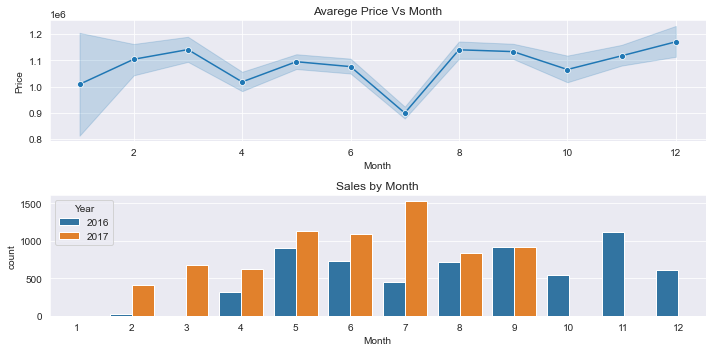

In [25]:
fig, axes = plt.subplots(2, 1, figsize=fig_dims)

sns.lineplot(data=melbdf,x='Month',y='Price',marker='o',ax=axes[0])
axes[0].set_title('Avarege Price Vs Month')

sns.countplot(x="Month",data = melbdf, hue='Year', ax=axes[1])
axes[1].set_title('Sales by Month')

fig.tight_layout();

-	We have almost 2 years of data, starting from Jan 2016 to Sep 2017, so we can compare months’ sales from April to September (March, October-December data is only for one year).
-	The number of sales increases from May to September although it’s wintertime in Australia. 
-	The fall in average price in July is probably due to the large number of properties offers at lower prices in 2017.
-	There is not enough data for summer time (December-March), so we cannot assess the correlation between price and the season and use it for price prediction.

In [26]:
month_ave=melbdf.groupby('Month')['Price'].mean()
month_ave

Month
1     1.009000e+06
2     1.104372e+06
3     1.141256e+06
4     1.018167e+06
5     1.095086e+06
6     1.076351e+06
7     8.995594e+05
8     1.140499e+06
9     1.133612e+06
10    1.065341e+06
11    1.117513e+06
12    1.170918e+06
Name: Price, dtype: float64

In [27]:
month_ave.std()

75330.44315600516